<a href="https://colab.research.google.com/github/hemang03/sntiment_train/blob/master/sentiment_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sentiment_train' , delimiter='\t')

In [3]:
df.shape

(6918, 2)

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus =[]
for i in range(0 , 6918):
  text = re.sub('[^a-zA-Z]' , ' ' , df['text'][i])
  text = text.lower()
  text = text.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  text = ([ps.stem(word) for word in text if not word in set(all_stopwords)])
  text = ' '.join(text)
  corpus.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[: , :-1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred ,y_test)

In [23]:
cm

array([[569,  18],
       [ 38, 759]])

In [26]:
import seaborn as sns
import pandas.util.testing as tm

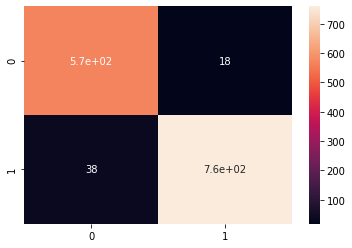

In [27]:
sns.heatmap(cm , annot=True)

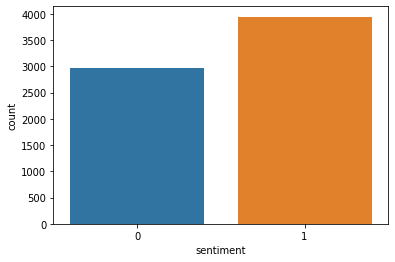

In [29]:
sns.countplot(x = 'sentiment' ,data = df)

In [30]:
from sklearn.metrics import classification_report
re =  classification_report(y_pred , y_test)

In [31]:
re

'              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.95       587\n           1       0.98      0.95      0.96       797\n\n    accuracy                           0.96      1384\n   macro avg       0.96      0.96      0.96      1384\nweighted avg       0.96      0.96      0.96      1384\n'

In [32]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred , y_test)

In [33]:
ac

0.9595375722543352